## MSBDS 590
Capstone: Ovarian Health

# Import Libraries

In [1]:
import numpy 
numpy.__version__ 
'1.21.4' 

C:\Users\south\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\south\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\south\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'1.21.4'

In [2]:
#import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mrmr
import os
%matplotlib inline

# Read Data

In [3]:
#Reading the dataset
oc = pd.read_csv('oc.csv')
oc 

,TYPE,MPV,BASO#,PHOS,GLU.,K,AST,BASO%,Mg,Menopause,...,TP,UA,RBC,PCT,CO2CP,TBIL,HCT,MONO%,MCV,ALP
0,0,11.70,0.01,1.46,4.67,5.36,24.0,0.30,0.78,0,...,73.9,396.4,2.64,0.090,19.9,5.5,0.273,5.70,103.4,56.0
1,0,10.00,0.02,1.09,10.50,4.38,13.0,0.30,0.82,1,...,72.0,119.2,4.89,0.300,22.3,6.8,0.417,5.50,85.3,95.0
2,0,11.40,0.03,0.97,4.64,4.30,18.0,0.60,1.00,0,...,77.9,209.2,4.62,0.130,22.2,14.8,0.391,5.40,84.6,77.0
3,0,7.38,0.05,1.25,4.76,4.70,17.0,0.74,1.11,1,...,66.1,215.6,4.01,0.250,24.0,10.9,0.372,6.55,92.6,26.0
4,0,10.40,0.01,0.94,4.07,4.77,27.0,0.10,1.08,0,...,66.5,206.0,4.40,0.280,26.2,5.3,0.383,10.00,87.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1,10.60,0.02,1.42,4.46,4.05,19.0,0.70,1.11,0,...,72.6,167.3,4.51,0.180,22.2,9.5,0.386,12.14,85.6,51.0
231,1,11.20,0.07,1.16,5.13,3.99,24.0,0.90,1.27,0,...,72.4,184.1,4.55,0.340,25.2,17.7,0.403,4.90,88.6,78.0
232,1,8.34,0.05,1.00,5.34,4.74,13.0,0.85,0.98,1,...,77.6,346.6,4.33,0.175,23.8,9.2,0.372,6.55,85.8,63.0
233,1,8.68,0.07,1.59,5.01,4.27,16.0,1.34,0.93,0,...,72.0,333.0,4.15,0.144,25.3,12.9,0.370,10.00,89.1,66.0


# Exploratory Data Analysis part 1

In [4]:
oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TYPE       235 non-null    int64  
 1   MPV        235 non-null    float64
 2   BASO#      235 non-null    float64
 3   PHOS       235 non-null    float64
 4   GLU.       235 non-null    float64
 5   K          235 non-null    float64
 6   AST        235 non-null    float64
 7   BASO%      235 non-null    float64
 8   Mg         235 non-null    float64
 9   Menopause  235 non-null    int64  
 10  CL         235 non-null    float64
 11  CEA        235 non-null    float64
 12  EO#        235 non-null    float64
 13  CA19-9     235 non-null    float64
 14  ALB        235 non-null    float64
 15  IBIL       235 non-null    float64
 16  GGT        235 non-null    float64
 17  MCH        235 non-null    float64
 18  GLO        235 non-null    float64
 19  ALT        235 non-null    float64
 20  DBIL      

In [5]:
# Assign risk to CA125 values greater than 35, as these levels may be indicative of cancer
oc['CA125'].values[oc['CA125'] > 35] = 1

In [6]:
oc['CA125'].values[oc['CA125'] < 35] = 0

In [7]:
#mRMR Selected features

In [8]:
# split data into features (X) and target (y)
oc_X_train = oc.drop('TYPE', axis=1)
oc_y_train = oc['TYPE']

In [9]:
# select top 10 features using MRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X = oc_X_train, y = oc_y_train, K = 10)

100%|██████████| 10/10 [00:00<00:00, 22.76it/s]


In [10]:
selected_features #Retaining the Age demographic for postmenopausal women, means that CA125 is not in the top 10 features, but it is 11th if K is set to a number 11+

['Age', 'CREA', 'LYM%', 'AST', 'Menopause', 'PDW', 'NEU', 'HE4', 'LYM#', 'PCT']

In [11]:
# Visualizing the correlation between the features in the training data
selected_cols = selected_features + ['TYPE']

# Selecting the row or column corresponding to the target column
target_corr = oc[selected_cols].corr()['TYPE']

# Displaying the correlation values of each feature with the target column in descending order
print("Correlation of selected features with target column \n")
print(target_corr)

Correlation of selected features with target column 

Age         -0.482835
CREA         0.203932
LYM%         0.433557
AST         -0.324609
Menopause   -0.416604
PDW          0.324485
NEU         -0.428291
HE4         -0.308719
LYM#         0.357680
PCT         -0.314408
TYPE         1.000000
Name: TYPE, dtype: float64


In [12]:
# Selecting the row or column corresponding to the target column
target_corr = oc[selected_cols].corr()['TYPE']
target_corr = np.sqrt(target_corr ** 2) # find the magnitude of each correlation

# Displaying the correlation values of each feature with the target column in descending order
print(target_corr.sort_values(ascending=False))

TYPE         1.000000
Age          0.482835
LYM%         0.433557
NEU          0.428291
Menopause    0.416604
LYM#         0.357680
AST          0.324609
PDW          0.324485
PCT          0.314408
HE4          0.308719
CREA         0.203932
Name: TYPE, dtype: float64


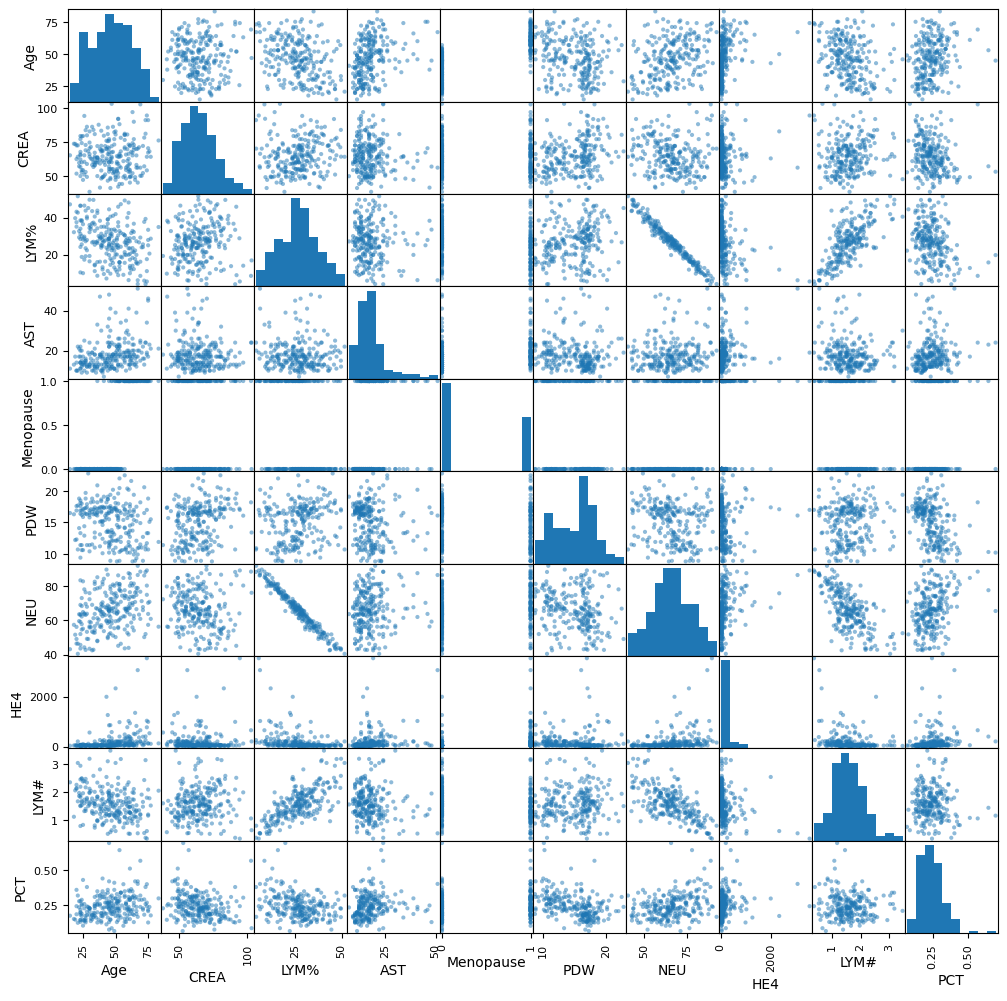

In [13]:
import matplotlib.pyplot as plt

# Create scatter plot matrix
pd.plotting.scatter_matrix(oc[selected_features], figsize=(12, 12))
plt.show()

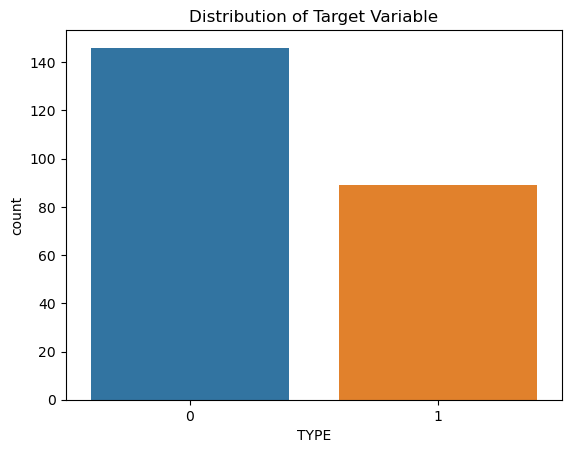

In [14]:
# Visualizing the distribution of the target variable in the training data
target_variable = oc['TYPE']
sns.countplot(x=target_variable, data=oc)
plt.title('Distribution of Target Variable')
plt.show()

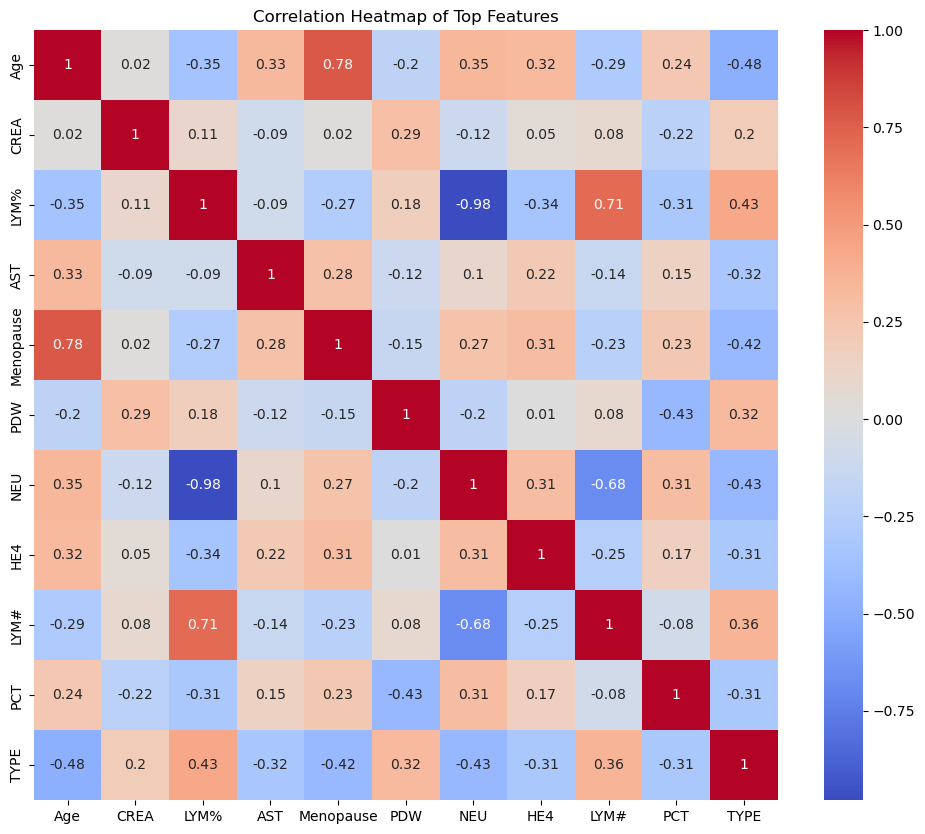

In [15]:
import seaborn as sns
# Create a correlation matrix
corr_matrix = np.around(oc[selected_cols].corr(), 2)

# Plot the heatmap using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()

<Axes: xlabel='CREA', ylabel='Count'>

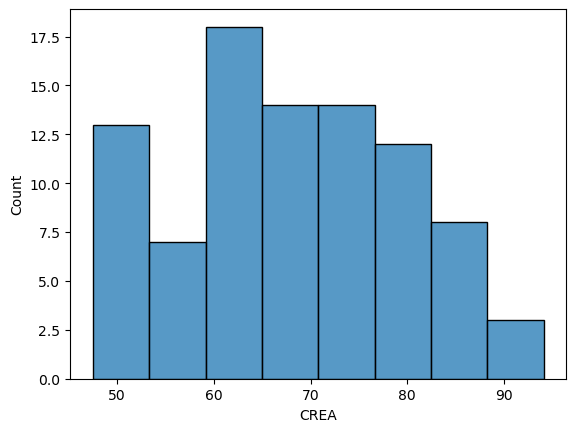

In [16]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "CREA")

<Axes: xlabel='PDW', ylabel='Count'>

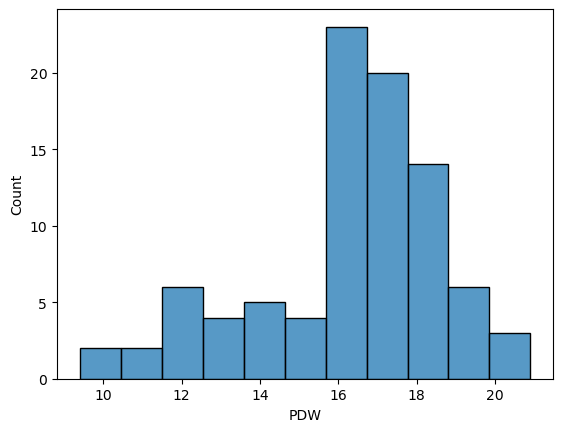

In [17]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "PDW")

<Axes: xlabel='LYM%', ylabel='Count'>

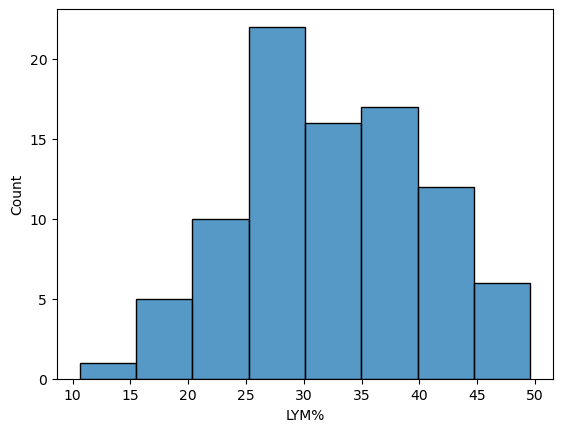

In [18]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "LYM%")

<Axes: xlabel='IBIL', ylabel='Count'>

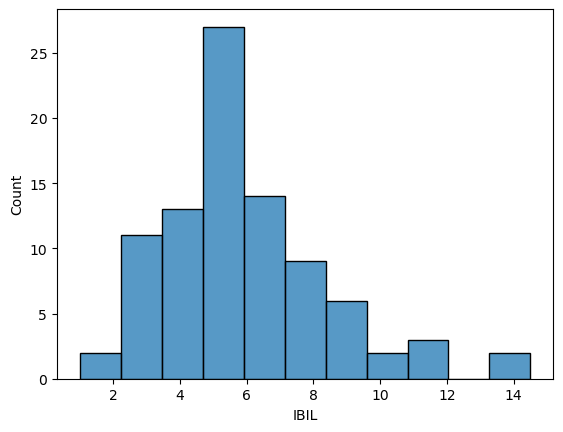

In [19]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "IBIL")

<Axes: xlabel='BASO%', ylabel='Count'>

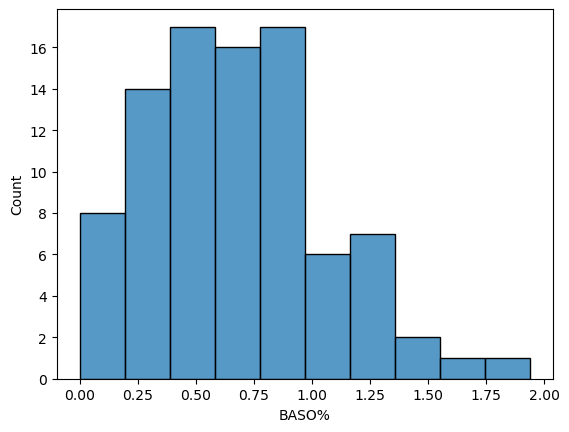

In [20]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "BASO%")

<Axes: xlabel='Age', ylabel='Count'>

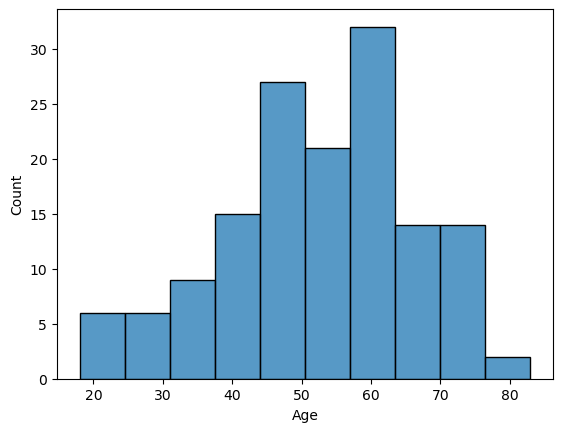

In [21]:
# Filter the data to only include positive values of the "TYPE" target column
positive_data = oc[oc['TYPE'] == 0]

# Create histogram using Seaborn
sns.histplot(data = positive_data, x = "Age")

<Axes: xlabel='Age', ylabel='Count'>

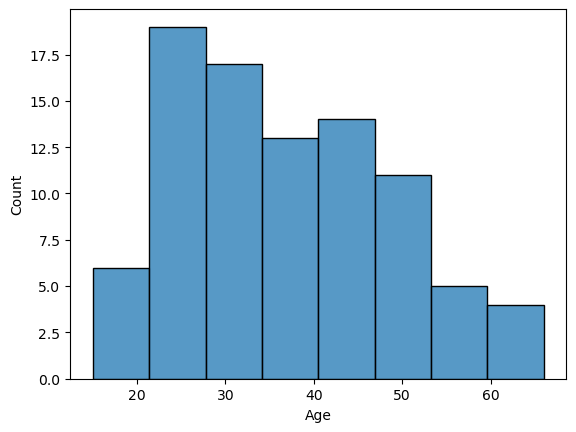

In [22]:
# Filter the data to only include positive values of the "TYPE" target column
negative_data = oc[oc['TYPE'] == 1]

# Create histogram using Seaborn
sns.histplot(data = negative_data, x = "Age")

# BUILD PREDICTIVE MODELS

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(oc_X_train, oc_y_train, test_size=0.3, random_state=25)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [24]:
X_train.shape

(164, 10)

In [25]:
X_test.shape

(71, 10)

In [26]:
y_train.shape

(164,)

In [27]:
y_test.shape  

(71,)

In [28]:
y_test = y_test.values.reshape(-1, 1)

In [29]:
y_train = y_train.values.reshape(-1, 1)

In [30]:
y_train.shape

(164, 1)

In [31]:
y_test.shape

(71, 1)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# create SVM classifier
svm_model = SVC(kernel='linear')

# train the model
svm_model.fit(X_train, y_train)

# Predicting the target values for test data
test_preds = svm_model.predict(X_test)

accuracy = svm_model.score(X_test, y_test)


# evaluate the model on the test set
print("SVM:")
print(classification_report(y_test, test_preds))

SVM:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.83      0.86      0.84        28

    accuracy                           0.87        71
   macro avg       0.87      0.87      0.87        71
weighted avg       0.87      0.87      0.87        71



In [33]:
import math
math.sqrt(len(y_test))

8.426149773176359

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors=9)

# train the model
knn.fit(X_train, y_train)

# Predicting the target values for test data
test_preds = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)


# evaluate the model on the test set
print("KNN:")
print(classification_report(y_test, test_preds))

KNN:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.80      1.00      0.89        28

    accuracy                           0.90        71
   macro avg       0.90      0.92      0.90        71
weighted avg       0.92      0.90      0.90        71



In [35]:
from sklearn.model_selection import cross_validate

In [36]:
#KNN model evaluation 
# 10-fold cv for KNN Model
knnNeigh = KNeighborsClassifier(n_neighbors=12)
cv_results = cross_validate(knnNeigh, oc_X_train, oc_y_train,
scoring='neg_mean_absolute_error', cv=10)
knnNeigh_scores = -1*cv_results['test_score']
knnNeigh_scores

array([0.20833333, 0.20833333, 0.125     , 0.125     , 0.08333333,
       0.13043478, 0.08695652, 0.17391304, 0.13043478, 0.26086957])

In [37]:
knnNeigh_scores.mean()

0.1532608695652174

In [38]:
# Get predicted class probabilities for the test set
test_preds_prob = knn.predict_proba(X_test)[:, 1]
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, test_preds_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, test_preds_prob)
roc_auc

0.9248338870431894

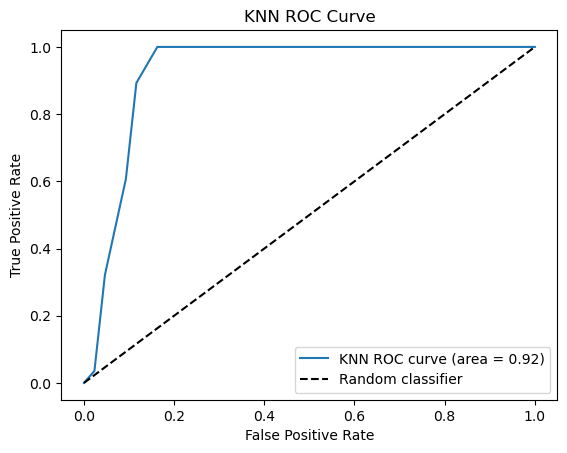

In [39]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='KNN ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

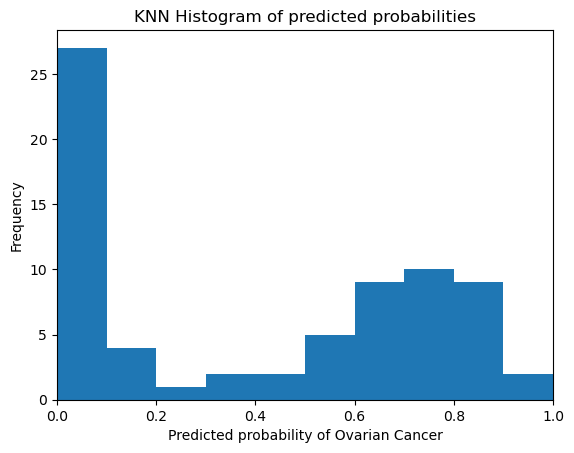

In [40]:
# Plot the predicted class probabilities
plt.hist(test_preds_prob, bins=10)
plt.xlim(0, 1)
plt.title('KNN Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Ovarian Cancer')
plt.ylabel('Frequency')
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree classifier
dt = DecisionTreeClassifier(random_state=0)

# fit the model to the training data
dt.fit(X_train, y_train)

# predict on the test data
y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)


# evaluate the model on the test set
print("Decision Trees:")
print(classification_report(y_test, y_pred))

Decision Trees:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        43
           1       0.67      0.64      0.65        28

    accuracy                           0.73        71
   macro avg       0.72      0.72      0.72        71
weighted avg       0.73      0.73      0.73        71



In [42]:
## 10-fold cv for Decision Tree Regression Model
dtcl = DecisionTreeClassifier()
cv_results = cross_validate(dtcl, oc_X_train, oc_y_train,
scoring='neg_mean_absolute_error', cv=10)
dtcl_scores = -1*cv_results['test_score']
dtcl_scores

array([0.08333333, 0.29166667, 0.16666667, 0.29166667, 0.04166667,
       0.30434783, 0.26086957, 0.13043478, 0.26086957, 0.2173913 ])

In [43]:
dtcl_scores.mean()

0.20489130434782607

In [44]:
# Get predicted class probabilities for the test set
test_preds_prob = dt.predict_proba(X_test)[:, 1]
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, test_preds_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, test_preds_prob)
roc_auc

0.7167774086378738

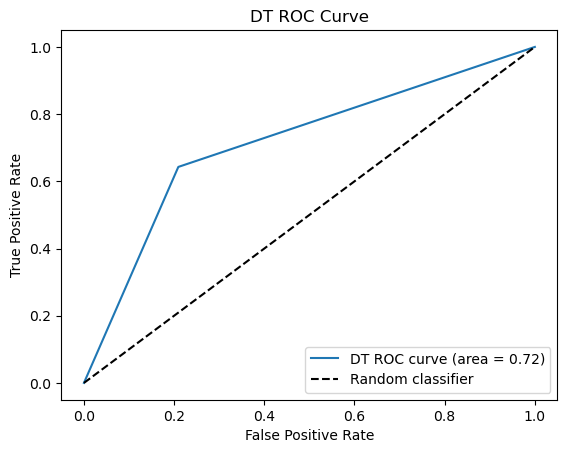

In [45]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='DT ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve')
plt.legend(loc="lower right")
plt.show()

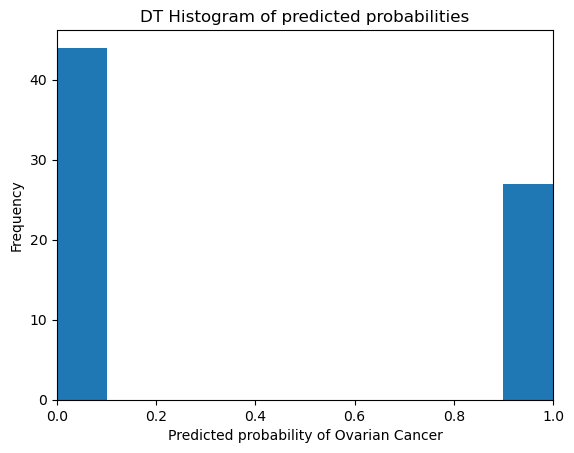

In [46]:
# Plot the predicted class probabilities
plt.hist(test_preds_prob, bins=10)
plt.xlim(0, 1)
plt.title('DT Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Ovarian Cancer')
plt.ylabel('Frequency')
plt.show()

# Above, the Set of mRMR Selected Features excluding CA125 ('Age', 'CREA', 'LYM%', 'AST', 'Menopause', 'PDW', 'NEU', 'HE4', 'LYM#', 'PCT') reflect that Accurcay for SVM is 87%, KNN is 90%, and DT is 73%

# The Prior First Set of mRMR Selected Features with CA125 included ('Age', 'CREA', 'LYM%', 'AST', 'CA125', 'PDW',  'Menopause', 'NEU', 'CEA', 'LYM#') reflect that Accuracy for SVM is 79%, KNN is 77%, and Decision Trees is 69%. SVM is the better performing model. The model performance is at its weakest with CA125 alone as the feature selected to define X, where performance accuracy reflects that SVM is 73%, KNN is 65%, and Decision Trees is 69%. 

# Below, The Second Set of Literature Supported Selected Features reflect Accuracy for SVM is 86%, KNN is 77%, and Decision Trees is 75%. SVM is the better performing model. SVM and Decision Trees outperform the first set of mRMR Selected Features with CA125 incl's accuracy performance.

# Predictive Modeling with Literature Supported Biomarkers combined with CA125 [['CA125', 'RBC', 'ALP', 'PCT', 'NEU', 'PLT', 'HE4', 'Age', 'Ca', 'Menopause']]

In [47]:
# split data into features (X) and target (y)
X = oc[['CA125', 'RBC', 'ALP', 'PCT', 'NEU', 'PLT', 'HE4', 'Age', 'Ca', 'Menopause']]
y = oc['TYPE']

In [48]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=25)

In [49]:
y_test1 = y_test1.values.reshape(-1, 1)

In [50]:
y_train1 = y_train1.values.reshape(-1, 1)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# create SVM classifier
svm_model1 = SVC(kernel='linear')

# train the model
svm_model1.fit(X_train1, y_train1)

# Predicting the target values for test data
test_preds1 = svm_model1.predict(X_test1)

accuracy1 = svm_model1.score(X_test1, y_test1)


# evaluate the model on the test set
print("SVM1:")
print(classification_report(y_test1, test_preds1))

SVM1:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        43
           1       0.75      0.96      0.84        28

    accuracy                           0.86        71
   macro avg       0.86      0.88      0.86        71
weighted avg       0.88      0.86      0.86        71



In [52]:
import math
math.sqrt(len(y_test1))

8.426149773176359

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=9)

# train the model
knn1.fit(X_train1, y_train1)

# Predicting the target values for test data
test_preds1 = knn1.predict(X_test1)

accuracy1 = knn1.score(X_test1, y_test1)


# evaluate the model on the test set
print("KNN1:")
print(classification_report(y_test1, test_preds1))

KNN1:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       0.71      0.71      0.71        28

    accuracy                           0.77        71
   macro avg       0.76      0.76      0.76        71
weighted avg       0.77      0.77      0.77        71



In [54]:
from sklearn.model_selection import cross_validate

In [55]:
#KNN model evaluation 
# 10-fold cv for KNN Model
knnNeigh1 = KNeighborsClassifier(n_neighbors=12)
cv_results1 = cross_validate(knnNeigh1, X, y,
scoring ='neg_mean_absolute_error', cv=10)
knnNeigh_scores1 = -1*cv_results1['test_score']
knnNeigh_scores1


array([0.20833333, 0.25      , 0.20833333, 0.125     , 0.16666667,
       0.17391304, 0.13043478, 0.26086957, 0.2173913 , 0.17391304])

In [56]:
knnNeigh_scores1.mean()

0.1914855072463768

In [57]:
# Get predicted class probabilities for the test set
test_preds1_prob = knn1.predict_proba(X_test1)[:, 1]
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test1, test_preds1_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc1 = roc_auc_score(y_test1, test_preds1_prob)
roc_auc1

0.8567275747508306

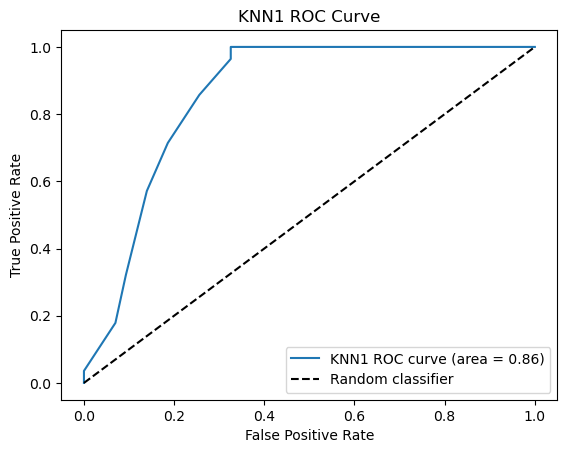

In [58]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='KNN1 ROC curve (area = %0.2f)' % roc_auc1)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN1 ROC Curve')
plt.legend(loc="lower right")
plt.show()

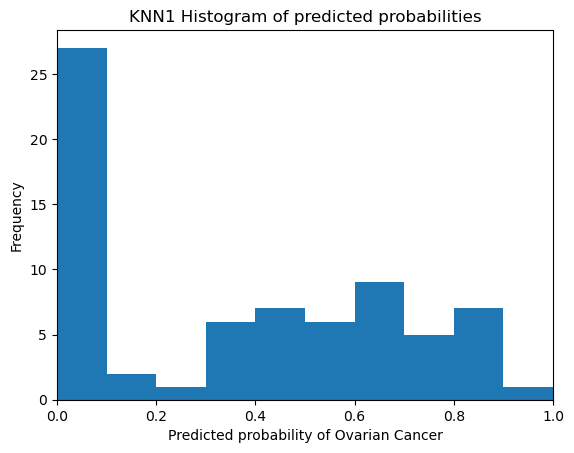

In [59]:
# Plot the predicted class probabilities
plt.hist(test_preds1_prob, bins=10)
plt.xlim(0, 1)
plt.title('KNN1 Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Ovarian Cancer')
plt.ylabel('Frequency')
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree classifier
dt1 = DecisionTreeClassifier(random_state=0)

# fit the model to the training data
dt1.fit(X_train1, y_train1)

# predict on the test data
y_pred1 = dt1.predict(X_test1)

accuracy1 = dt1.score(X_test1, y_test1)


# evaluate the model on the test set
print("Decision Trees1:")
print(classification_report(y_test1, y_pred1))

Decision Trees1:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        43
           1       0.69      0.64      0.67        28

    accuracy                           0.75        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.74      0.75      0.74        71



In [61]:
## 10-fold cv for Decision Tree Regression Model
dtcl1 = DecisionTreeClassifier()
cv_results1 = cross_validate(dtcl1, X, y,
scoring='neg_mean_absolute_error', cv=10)
dtcl_scores1 = -1*cv_results1['test_score']
dtcl_scores1

array([0.16666667, 0.29166667, 0.16666667, 0.20833333, 0.04166667,
       0.30434783, 0.17391304, 0.2173913 , 0.30434783, 0.34782609])

In [62]:
dtcl_scores1.mean()

0.22228260869565214

In [63]:
# Get predicted class probabilities for the test set
test_preds1_prob = dt1.predict_proba(X_test1)[:, 1]
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test1, test_preds1_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc1 = roc_auc_score(y_test1, test_preds1_prob)
roc_auc1

0.728405315614618

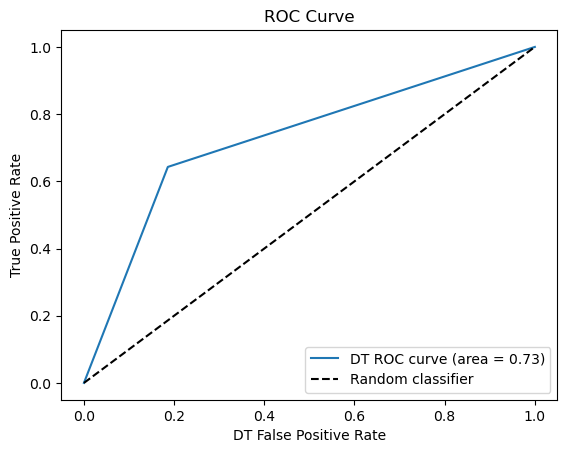

In [64]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='DT ROC curve (area = %0.2f)' % roc_auc1)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('DT False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


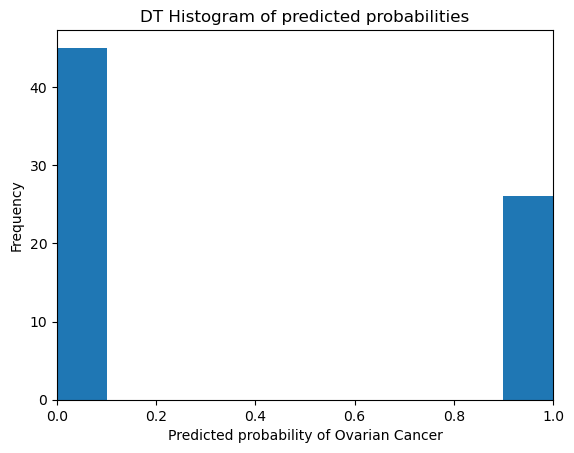

In [65]:
# Plot the predicted class probabilities
plt.hist(test_preds1_prob, bins=10)
plt.xlim(0, 1)
plt.title('DT Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Ovarian Cancer')
plt.ylabel('Frequency')
plt.show()